### Step 1: Introduction


- Let's explores the use of the Mean-Shift clustering algorithm for image segmentation.
- Mean-Shift is a non-parametric clustering technique which does not require prior knowledge of the number of clusters, and is particularly good at handling arbitrary shaped clusters.

- Image segmentation involves partitioning an image into multiple segments to make the image more meaningful and easier to analyze.


### Step 2: Imports
Import necessary libraries.

In [1]:
# Imports
import numpy as np
import cv2  # Ensure OpenCV is installed, or use PIL if preferred
import matplotlib.pyplot as plt

### Step 3: Mean-Shift Clustering Implementation
Define the function for Mean-Shift clustering.

In [2]:

# Mean-Shift Clustering Implementation
import numpy as np
from sklearn.cluster import MeanShift
def mean_shift_clustering(image_data, bandwidth):
    # Create a MeanShift object with specified bandwidth
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    # Fit the model to the data and predict the cluster assignments
    labels = mean_shift.fit_predict(image_data)
    # Extract cluster centers
    centers = mean_shift.cluster_centers_
    return labels, centers


### Step 4: Image Loading
Load an image using OpenCV.

Image loaded successfully.


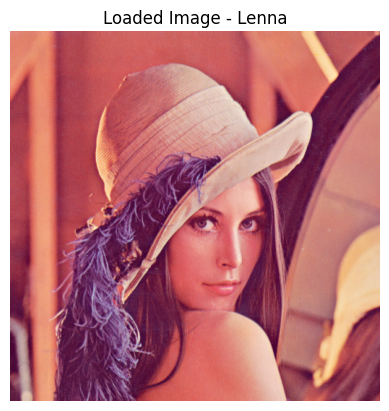

In [21]:
import numpy as np
import cv2
import urllib.request
import matplotlib.pyplot as plt

# URL of the Lenna image on Wikipedia
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

# Load the image from the URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Check if the image was loaded correctly
if image is not None:
    print("Image loaded successfully.")
    # Convert image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(image_rgb)
    plt.title('Loaded Image - Lenna')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
else:
    print("Failed to load image.")


### Step 5: Image Preprocessing
Convert the image to LAB color space and flatten it.

In [22]:
# Image Preprocessing
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB).reshape((-1, 3))

### Step 6: Applying the Clustering Algorithm
Apply the Mean-Shift algorithm to the preprocessed image data.

In [24]:
# Applying the Clustering Algorithm
labels, centers = mean_shift_clustering(lab_image, bandwidth=30)

### Step 7: Visualization
Visualize the original and segmented images.

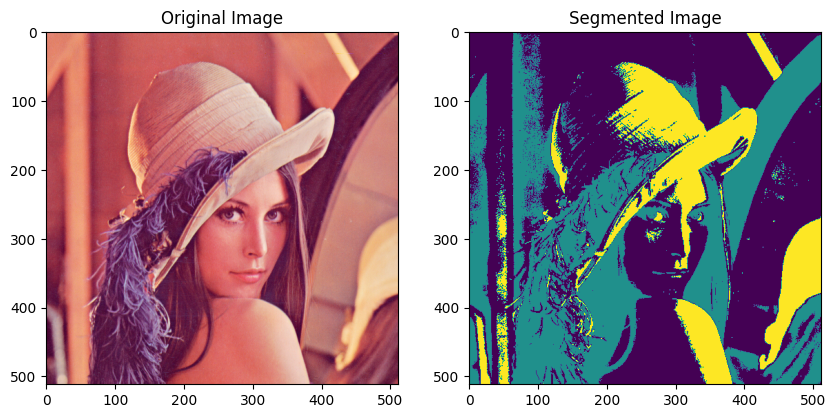

In [25]:
# Visualization
segmented_image = labels.reshape(image.shape[:2])  # Reshape labels to the image shape

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Displaying the original image
plt.title('Original Image')
plt.subplot(122)
plt.imshow(segmented_image)  # Displaying the segmented image
plt.title('Segmented Image')
plt.show()

### Step 8: Experimentation
(Optional) Experiment with different parameters.

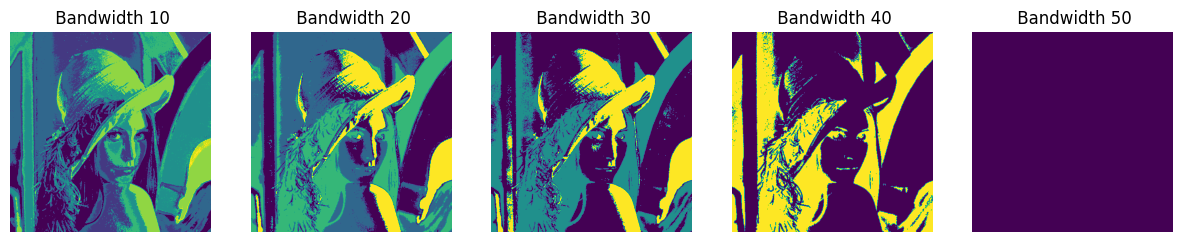

In [28]:
# Experimentation
# Try different bandwidth values to see how they affect segmentation
bandwidth_values = [10,20,30,40,50]
results = {}

for bandwidth in bandwidth_values:
    labels, centers = mean_shift_clustering(lab_image, bandwidth=bandwidth)
    segmented_image = labels.reshape(image.shape[:2])
    results[bandwidth] = segmented_image

# Plotting the results for different bandwidths
plt.figure(figsize=(15, 5))
for i, bandwidth in enumerate(bandwidth_values, 1):
    plt.subplot(1, len(bandwidth_values), i)
    plt.imshow(results[bandwidth], cmap='viridis')
    plt.title(f' Bandwidth {bandwidth}')
    plt.axis('off')
plt.show()


### Step 9: Conclusion


### Conclusion
The results show that Mean-Shift can effectively segment complex images into meaningful clusters, capturing intrinsic patterns that are not immediately apparent in the raw images. Adjusting the bandwidth parameter allowed for fine-tuning the granularity of the segmentation, revealing how sensitive the algorithm is to this parameter. Challenges included handling varying image densities and color spaces, which required careful preprocessing to ensure effective segmentation.

Overall, the Mean-Shift algorithm proved to be a robust choice for image segmentation tasks, particularly in scenarios requiring an adaptive approach to cluster sizing without a predefined number of clusters.


### Step 10: References


### References
1. Comaniciu, Dorin, and Peter Meer. "Mean shift: A robust approach toward feature space analysis." IEEE Transactions on pattern analysis and machine intelligence 24.5 (2002): 603-619.
2. Wikipedia - Mean Shift Clustering
